 # Lotto Analysis

Here I'll be running an analysis of the Lotto draw results.

We begin by reading in the results from the web scraping exercise earlier.

In [1]:
import pickle

In [15]:
with open("results_dict.pkl", "r") as f:
    results_dict = pickle.load(f)
    f.close()

ValueError: unsupported pickle protocol: 3

In [5]:
results_dict['1000']

NameError: name 'results_dict' is not defined

In [13]:
from sys import getsizeof
getsizeof(results_dict)

98400

## The Ground Truth

Let's have a go at establishing some ground truths, and answering simple questions.

First, what is the distribution of the ball results?

In [22]:
# The usual imports
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn
seaborn.set()

In [27]:
def link_to_date(link):
    date = pd.to_datetime(link.rsplit("/", 1)[-1] + " 20:00")
    return date

In [31]:
for key in results_dict:
    results_dict[key]['date'] = link_to_date(results_dict[key]['link'])

In [32]:
lotto_results = []
for key in results_dict:
    lotto_results += results_dict[key]['lotto result']
    lotto_results.append(results_dict[key]['bonus ball'])
lotto_results = [int(result) for result in lotto_results]
print(lotto_results[:50])

[8, 20, 22, 25, 32, 34, 18, 11, 15, 21, 24, 37, 38, 36, 3, 7, 9, 18, 28, 30, 23, 6, 15, 35, 37, 39, 40, 8, 1, 18, 26, 32, 37, 38, 40, 3, 4, 19, 20, 28, 35, 25, 1, 15, 20, 26, 29, 38, 34, 2]


In [33]:
def plot_results(results, kind):
    result_counts = pd.Series(results).value_counts()
    result_counts = result_counts.sort_index()
    result_counts.plot(kind=kind)

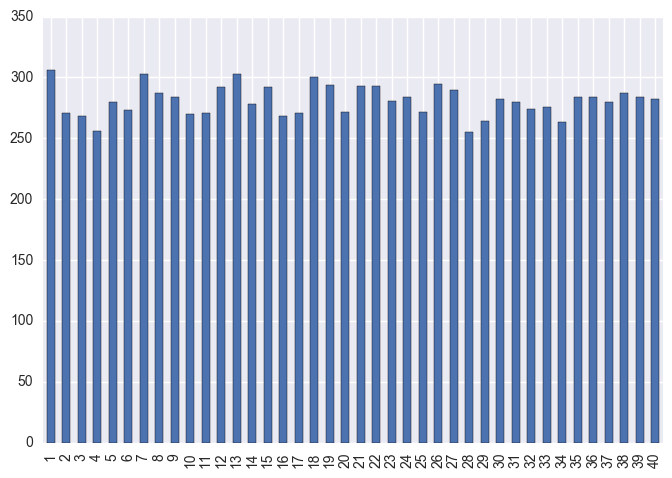

In [34]:
plot_results(lotto_results, kind='bar')

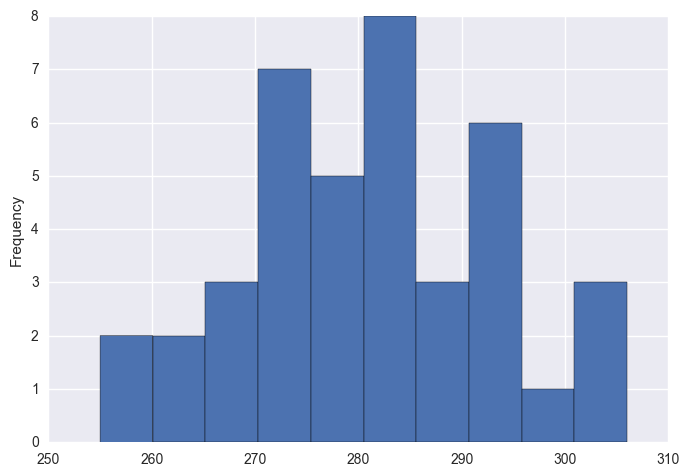

In [35]:
plot_results(lotto_results, kind='hist')

In [36]:
powerball_results = [int(results_dict[key]['powerball']) for key in results_dict \
                    if 'powerball' in results_dict[key].keys()]
print(powerball_results[:50])

[4, 2, 4, 2, 2, 8, 7, 8, 2, 1, 1, 1, 1, 3, 1, 8, 6, 6, 7, 8, 7, 3, 8, 1, 6, 5, 7, 3, 8, 6, 5, 7, 2, 3, 2, 4, 10, 8, 3, 1, 7, 3, 6, 9, 6, 6, 5, 4, 9, 1]


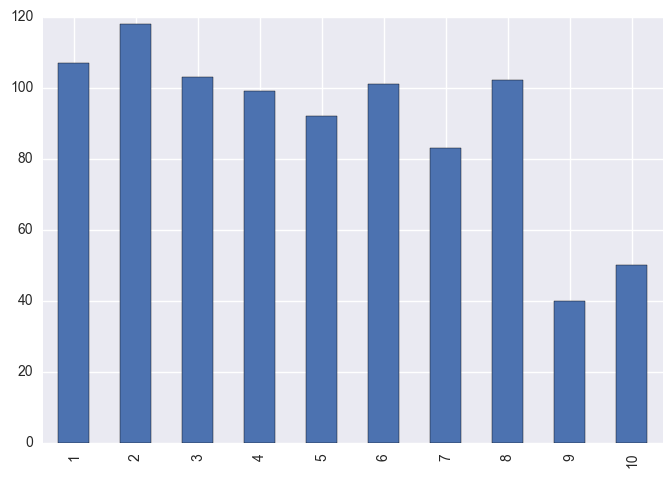

In [37]:
plot_results(powerball_results, kind='bar')

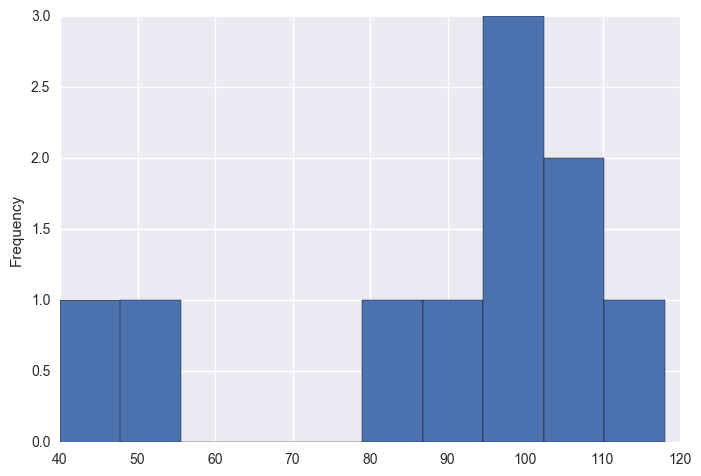

In [38]:
plot_results(powerball_results, kind='hist')

Later I'd like to investigate what evidence there is that the lotto draws really are random.

The powerball results seem the most non-random, but this is what you would also expect since they are also drawn from a smaller sample. The lotto results seem more random, but there is such a thing as 'too random', and we could also investigate the possibility that numbers are drawn to make the results appear closer to random than they otherwise might be.

With that said, my belief is that the draw really is as shown by the machine on the screen. If this is the case, then this makes the possibility of any preferentially introduced non-randomness unlikely, unless they are weighting the balls or doing something similar.

The other question that I want to answer is how many lotto tickets are generally sold.

In [39]:
winners = []
for key in sorted([int(key) for key in results_dict]):
    if 'lotto divisions' in results_dict[str(key)].keys():
        winners.append(results_dict[str(key)]['lotto divisions']['Winners'])

In [40]:
winners_df = pd.concat(winners, axis=1)
winners_df = winners_df.applymap(lambda s: ''.join([l for l in s if l != ","])).astype(np.int32)
winners_df

,Winners,Winners,Winners,Winners,Winners,Winners,Winners,Winners,Winners,Winners,...,Winners,Winners,Winners,Winners,Winners,Winners,Winners,Winners,Winners,Winners
0,1,1,0,2,3,0,2,3,8,0,...,1,0,0,6,1,5,3,5,1,1
1,9,16,16,15,9,10,11,18,9,14,...,3,6,12,12,4,13,10,19,6,21
2,436,443,562,430,601,442,501,432,492,414,...,194,397,237,388,222,461,243,701,233,531
3,1109,1296,1345,1206,1133,1062,1496,1306,1418,1029,...,507,971,629,1057,580,1148,541,1553,659,1472
4,18152,19705,20770,20129,19125,20506,19554,17883,19448,17306,...,8141,16207,9967,15749,8953,16946,9557,26064,9676,23934
5,25056,27024,27774,26682,24312,25008,29605,26024,27457,24908,...,11420,20562,13353,22720,13362,24429,13392,32471,14024,32505


In [47]:
winners_df_t = winners_df.transpose()
dates = [results_dict[key]['date'] for key in results_dict if 'date' in results_dict.keys()]
winners_df_t.set_index(dates)
winners_df_t

ValueError: Must pass non-zero number of levels/labels

In [41]:
winners_df.ix[0,:].astype(np.int32).mean()

2.291725105189341

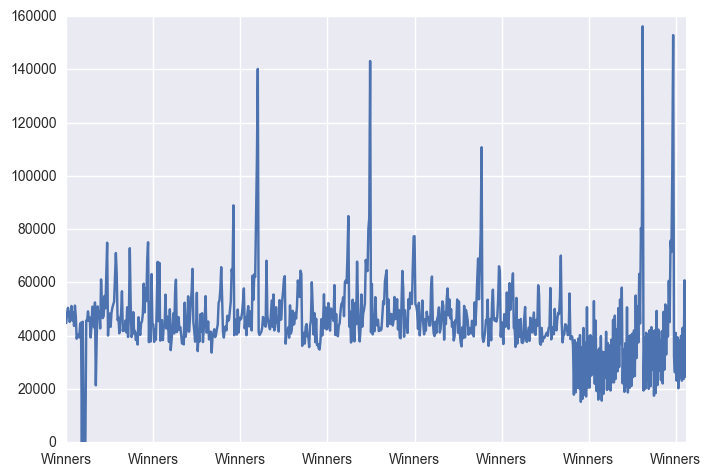

In [42]:
winners_df.sum(axis=0).plot()

## Randomness Testing

Rather than fix the problems with the code above (as I can't be bothered doing it at the moment), lets attempt a simple randomness test on the lotto results.

In [166]:
print(lotto_results[:20])

[7, 9, 12, 16, 17, 19, 20, 11, 13, 14, 15, 35, 37, 7, 9, 10, 12, 26, 27, 38]


In [167]:
len(lotto_results)

11242

In [232]:
mu = len(lotto_results)/40
mu

281.05

In [266]:
lotto_counts = pd.Series(lotto_results).value_counts()
lotto_counts = result_counts.sort_index()
lotto_norm = np.sqrt(sum((lotto_counts - mu)**2)/mu**2)
lotto_norm

0.27638563339275934

In [258]:
numsims = 50000
sims = np.random.randint(1,41, size=(numsims,len(lotto_results)))
sims

array([[31, 26,  5, ..., 38, 24, 40],
       [21, 34, 12, ..., 34, 17,  9],
       [36, 27, 40, ..., 30,  3, 38],
       ..., 
       [ 5,  8, 17, ..., 10, 24,  9],
       [31, 38, 10, ..., 30, 30,  9],
       [22, 12, 20, ..., 31, 13,  9]])

In [268]:
sim_counts = np.apply_along_axis(func1d=lambda x: np.bincount(x), axis=1, arr=sims)[:,1:]
sim_norms = np.sqrt(np.sum((sim_counts - mu)**2, axis=1)/mu**2)
sim_norms

array([ 0.34205587,  0.3220785 ,  0.36986811, ...,  0.42108708,
        0.42264757,  0.41515253])

In [274]:
sum(sim_norms <= lotto_norm)/numsims

0.01072

So from this calculation, we can conlude that the probability of a deviation from uniformity this large is 98.96%, given that the draw occurs randomly.

What we want to know however, is the probability that the draw is random, given that this is the sort of deviation that we see.

(array([  1.00000000e+00,   1.00000000e+00,   4.00000000e+00,
          6.00000000e+00,   3.00000000e+00,   1.30000000e+01,
          2.20000000e+01,   3.50000000e+01,   6.00000000e+01,
          9.70000000e+01,   1.69000000e+02,   2.43000000e+02,
          3.29000000e+02,   5.30000000e+02,   7.99000000e+02,
          9.72000000e+02,   1.30200000e+03,   1.70600000e+03,
          1.98800000e+03,   2.35800000e+03,   2.63700000e+03,
          2.90900000e+03,   3.00800000e+03,   3.24800000e+03,
          3.33200000e+03,   3.30000000e+03,   3.13600000e+03,
          2.97200000e+03,   2.67000000e+03,   2.33500000e+03,
          2.11100000e+03,   1.74700000e+03,   1.42100000e+03,
          1.15300000e+03,   9.03000000e+02,   6.96000000e+02,
          5.11000000e+02,   3.93000000e+02,   2.85000000e+02,
          2.11000000e+02,   1.35000000e+02,   9.70000000e+01,
          6.60000000e+01,   3.30000000e+01,   2.10000000e+01,
          9.00000000e+00,   9.00000000e+00,   5.00000000e+00,
        

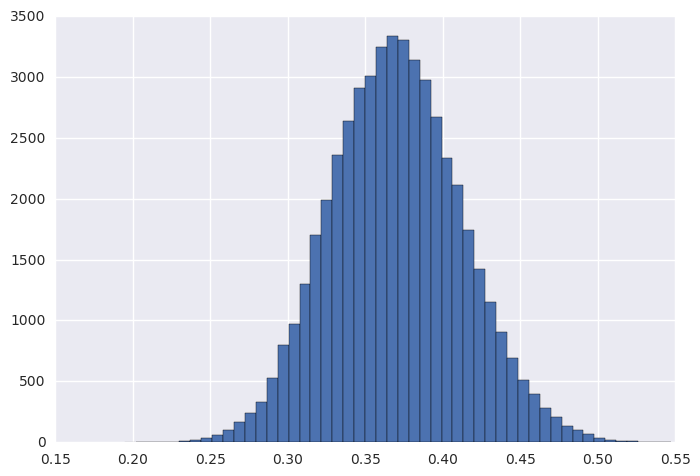

In [270]:
plt.hist(sim_norms, bins=50)

In [273]:
sim_norms.mean(), np.sqrt(sim_norms.var())

(0.37013278916013781, 0.042368470100168185)

And now to do the same thing with the powerball draw:

In [280]:
powerball_mean = len(powerball_results)/10
powerball_mean

89.5

In [295]:
powerball_counts = pd.Series(powerball_results).value_counts()
powerball_counts = powerball_counts.sort_index()
powerball_norm = np.sqrt(sum((powerball_counts - powerball_mean)**2)/powerball_mean**2)
powerball_norm

0.84640098026520594

In [292]:
powerball_counts

1     107
2     118
3     103
4      99
5      92
6     101
7      83
8     102
9      40
10     50
dtype: int64

In [293]:
numsims = 50000
sims = np.random.randint(1,11, size=(numsims,len(powerball_results)))
sim_counts = np.apply_along_axis(func1d=lambda x: np.bincount(x), axis=1, arr=sims)[:,1:]
sim_norms = np.sqrt(np.sum((sim_counts - powerball_mean)**2, axis=1)/powerball_mean**2)

(array([  2.00000000e+00,   3.00000000e+00,   1.10000000e+01,
          2.40000000e+01,   5.60000000e+01,   1.16000000e+02,
          1.72000000e+02,   3.20000000e+02,   4.70000000e+02,
          6.81000000e+02,   9.41000000e+02,   1.22200000e+03,
          1.59300000e+03,   1.87500000e+03,   2.24100000e+03,
          2.48500000e+03,   2.81700000e+03,   2.96700000e+03,
          3.15900000e+03,   3.29400000e+03,   3.21200000e+03,
          3.13500000e+03,   2.92200000e+03,   2.67000000e+03,
          2.45700000e+03,   2.14400000e+03,   1.85400000e+03,
          1.49700000e+03,   1.31800000e+03,   1.05500000e+03,
          8.18000000e+02,   6.87000000e+02,   4.89000000e+02,
          4.01000000e+02,   2.55000000e+02,   1.99000000e+02,
          1.39000000e+02,   9.10000000e+01,   7.30000000e+01,
          3.60000000e+01,   3.10000000e+01,   1.80000000e+01,
          2.10000000e+01,   1.30000000e+01,   9.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   3.00000000e+00,
        

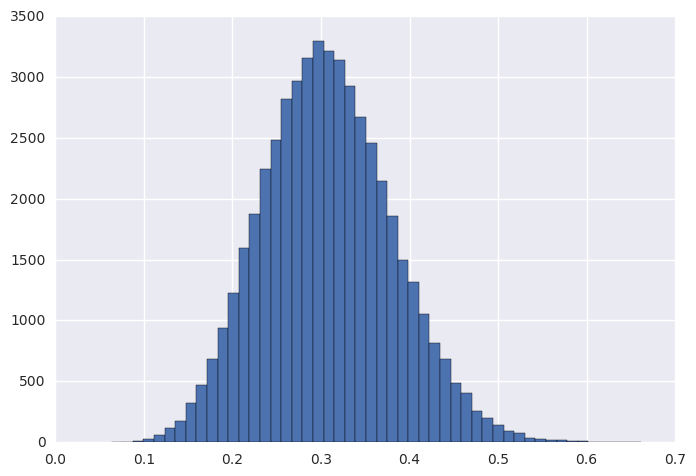

In [304]:
plt.hist(sim_norms, bins=50)

In [307]:
sim_norms.mean(), np.sqrt(sim_norms.var())

(0.3078269298905536, 0.073492537471495659)

In [311]:
(powerball_norm - sim_norms.mean())/np.sqrt(sim_norms.var())

7.3282821481506231

So the result is at the 7 sigma level of significance.

In [314]:
results_dict['3']['bonus ball']

'38'

In [316]:
[num for num in range(1, 1609) if str(num) not in results_dict.keys()]

[795, 914]

In [317]:
results_dict['794']

{'bonus ball': '6',
 'draw number': '794',
 'jackpot': 'Rollover',
 'link': 'http://lottoresults.co.nz/lotto/21-september-2002',
 'lotto result': ['3', '10', '21', '22', '26', '34'],
 'powerball': '4',
 'strike': ['34', '26', '3', '21'],
 'title': 'Lotto Result for Saturday, 21 September 2002 '}